<a href="https://www.kaggle.com/code/sarraverse/00-data-exploration?scriptVersionId=284158091" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/job-skills/skill_migration_public.csv
/kaggle/input/job-skills/all_jobs_clustered_full.csv
/kaggle/input/job-skills/association_rules_categories.csv
/kaggle/input/job-skills/all_jobs_mapped.csv
/kaggle/input/job-skills/all_jobs_clustered_sample_dbscan.csv
/kaggle/input/job-skills/association_rules_combined.csv
/kaggle/input/job-skills/all_jobs_clean_full.csv
/kaggle/input/job-skills/skill_migration_clean.csv
/kaggle/input/job-skills/association_rules_skills.csv
/kaggle/input/job-skills/all_jobs.csv


# EXPLORATORY DATA ANALYSIS


Current working directory: /kaggle/working
Files in input folder: ['job-skills']


/tmp/ipykernel_20/1919206234.py:10: DtypeWarning: Columns (1,6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  all_jobs = pd.read_csv("/kaggle/input/job-skills/all_jobs.csv")


Dataset shape: (2913372, 10)
Columns: ['source', 'job_key', 'job_title', 'job_description', 'skills_raw', 'location', 'country', 'company', 'qualifications', 'responsibilities']

=== BEFORE PREPROCESSING ===


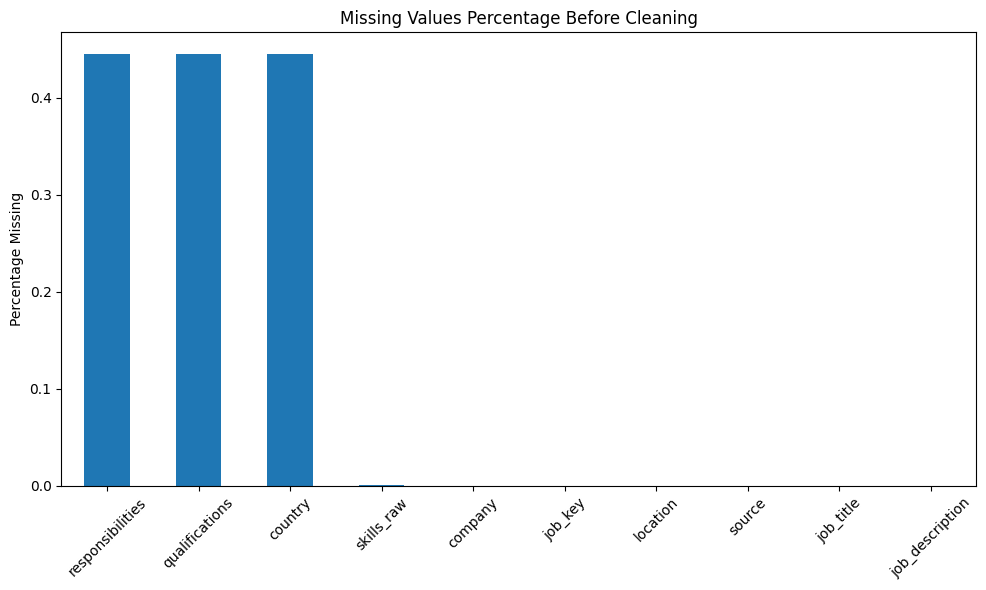

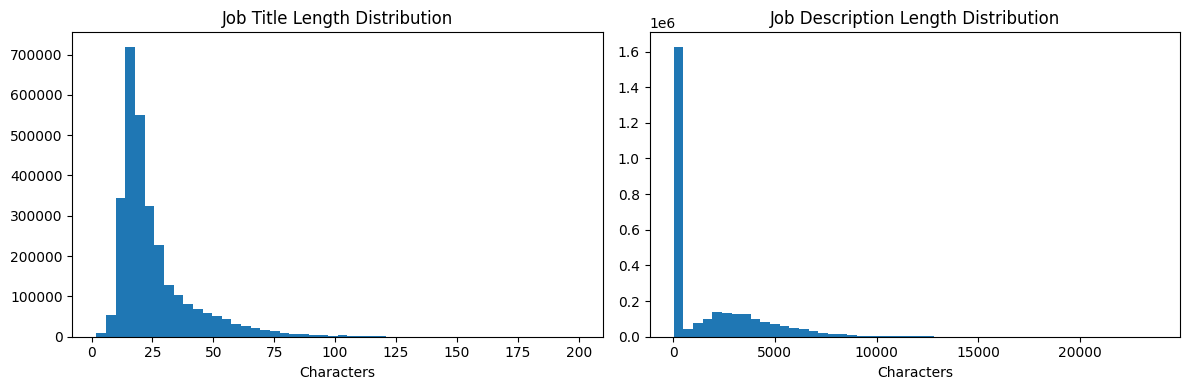

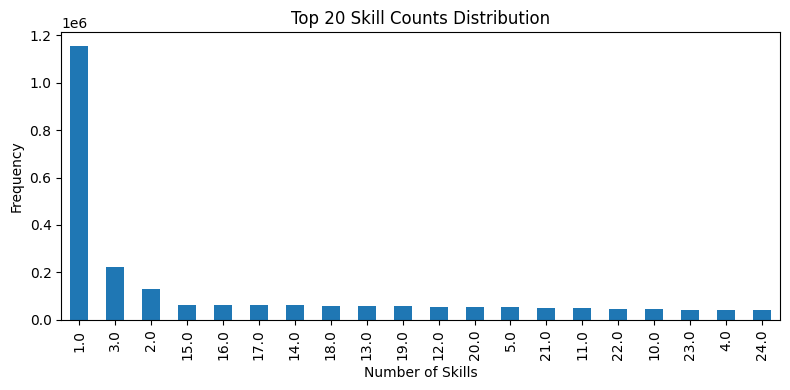


Exploration Summary: {'original_shape': (2913372, 13), 'missing_percentages': {'source': 0.0, 'job_key': 3.4324487226485325e-05, 'job_title': 0.0, 'job_description': 0.0, 'skills_raw': 0.0010420914321960944, 'location': 6.521652573032211e-06, 'country': 0.44533688111233305, 'company': 3.7413691076869005e-05, 'qualifications': 0.44533688111233305, 'responsibilities': 0.44533688111233305, 'title_length': 0.0, 'desc_length': 0.0, 'skill_count': 0.0010420914321960944}, 'data_types': {'source': 'object', 'job_key': 'object', 'job_title': 'object', 'job_description': 'object', 'skills_raw': 'object', 'location': 'object', 'country': 'object', 'company': 'object', 'qualifications': 'object', 'responsibilities': 'object', 'title_length': 'int64', 'desc_length': 'int64', 'skill_count': 'float64'}, 'memory_usage_mb': 11290.001212120056}


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check current working directory
print("Current working directory:", os.getcwd())
print("Files in input folder:", os.listdir("/kaggle/input"))

# Load raw data
all_jobs = pd.read_csv("/kaggle/input/job-skills/all_jobs.csv")
df = all_jobs.copy()

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# BEFORE PREPROCESSING VISUALIZATIONS
print("\n=== BEFORE PREPROCESSING ===")

# 1. Missing values
missing_series = df.isna().mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
missing_series.plot(kind='bar')
plt.title('Missing Values Percentage Before Cleaning')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Text length distributions
df['title_length'] = df['job_title'].str.len()
df['desc_length'] = df['job_description'].str.len()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(df['title_length'].dropna(), bins=50)
axes[0].set_title('Job Title Length Distribution')
axes[0].set_xlabel('Characters')

axes[1].hist(df['desc_length'].dropna(), bins=50)
axes[1].set_title('Job Description Length Distribution')
axes[1].set_xlabel('Characters')
plt.tight_layout()
plt.show()

# 3. Skill count distribution (if skills_raw exists)
if 'skills_raw' in df.columns:
    df['skill_count'] = df['skills_raw'].str.split(',').str.len()
    plt.figure(figsize=(8, 4))
    df['skill_count'].value_counts().head(20).plot(kind='bar')
    plt.title('Top 20 Skill Counts Distribution')
    plt.xlabel('Number of Skills')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Save summary statistics
exploration_summary = {
    'original_shape': df.shape,
    'missing_percentages': df.isna().mean().to_dict(),
    'data_types': df.dtypes.astype(str).to_dict(),
    'memory_usage_mb': df.memory_usage(deep=True).sum() / (1024**2)
}

print(f"\nExploration Summary: {exploration_summary}")